In [49]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import pandas as pd
from spacy.tokenizer import Tokenizer
from spacy.lang.tr import Turkish
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#import torch
#import transformers as ppb # pytorch transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [50]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()

data = pd.read_csv(io.StringIO(uploaded['lemessi10.csv'].decode('utf-8')))
data

Saving lemessi10.csv to lemessi10 (3).csv


,tweet
0,leo messi cristiano special competition among us easy situation keep high level long rivalry ronaldo remain peoples mind forever
1,poles stop leo messi
2,la liga goal assist king champions league top scorer name deserving mediocre team valde alone sirtladiballondor goat leo messi ballondor
3,leo messi became first player score goal different team champions league
4,come tomorrow start work fenerbahçe
...,...
20099,via drawing lionel messi art lionelmessi barcelona charcoal
20100,lionel messi made funny comment allegations made coach selection argentina national team
20101,lionelmessi dont worry messi father go jail give total million euros lionel messi
20102,lionel messi without detonating bomb


In [51]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['tweet'].apply(getSubjectivity)
data['Polarity'] = data['tweet'].apply(getPolarity)

data

,tweet,Subjectivity,Polarity
0,leo messi cristiano special competition among us easy situation keep high level long rivalry ronaldo remain peoples mind forever,0.586190,0.225119
1,poles stop leo messi,0.000000,0.000000
2,la liga goal assist king champions league top scorer name deserving mediocre team valde alone sirtladiballondor goat leo messi ballondor,0.766667,0.200000
3,leo messi became first player score goal different team champions league,0.466667,0.125000
4,come tomorrow start work fenerbahçe,0.000000,0.000000
...,...,...,...
20099,via drawing lionel messi art lionelmessi barcelona charcoal,0.000000,0.000000
20100,lionel messi made funny comment allegations made coach selection argentina national team,1.000000,0.250000
20101,lionelmessi dont worry messi father go jail give total million euros lionel messi,0.375000,-0.050000
20102,lionel messi without detonating bomb,0.000000,0.000000


In [52]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)
data

,tweet,Subjectivity,Polarity,Analysis
0,leo messi cristiano special competition among us easy situation keep high level long rivalry ronaldo remain peoples mind forever,0.586190,0.225119,Positive
1,poles stop leo messi,0.000000,0.000000,Neutral
2,la liga goal assist king champions league top scorer name deserving mediocre team valde alone sirtladiballondor goat leo messi ballondor,0.766667,0.200000,Positive
3,leo messi became first player score goal different team champions league,0.466667,0.125000,Positive
4,come tomorrow start work fenerbahçe,0.000000,0.000000,Neutral
...,...,...,...,...
20099,via drawing lionel messi art lionelmessi barcelona charcoal,0.000000,0.000000,Neutral
20100,lionel messi made funny comment allegations made coach selection argentina national team,1.000000,0.250000,Positive
20101,lionelmessi dont worry messi father go jail give total million euros lionel messi,0.375000,-0.050000,Negative
20102,lionel messi without detonating bomb,0.000000,0.000000,Neutral


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

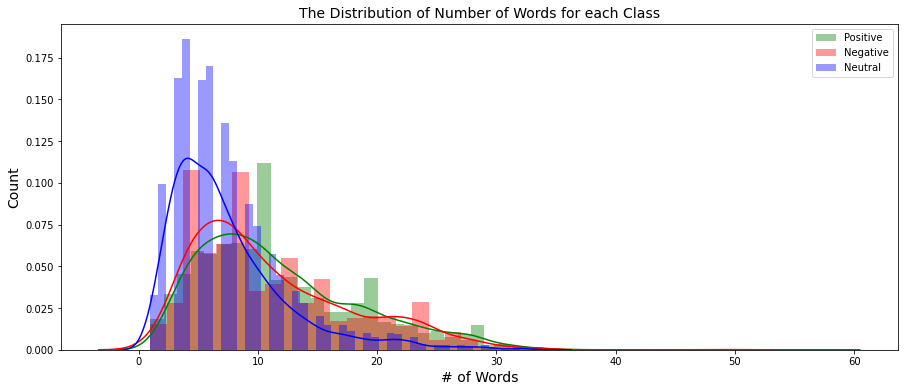

In [54]:
data['n_words'] = [len(t.split()) for t in data.tweet]

fig = plt.figure(figsize = (15, 6))
sns.distplot(data['n_words'][data['Analysis']=='Positive'], color='g', label = 'Positive')
sns.distplot(data['n_words'][data['Analysis']=='Negative'], color='r', label = 'Negative')
sns.distplot(data['n_words'][data['Analysis']=='Neutral'], color='b', label = 'Neutral')
plt.legend(loc='best')
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('The Distribution of Number of Words for each Class', fontsize = 14)
plt.show()

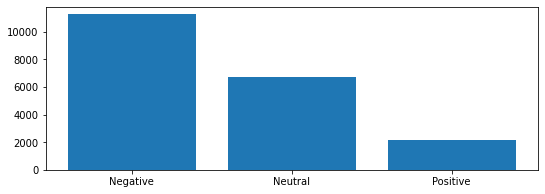

In [55]:
import matplotlib.pyplot as plt
sentiment_counts = data.Analysis.value_counts()
names = ['Negative', 'Neutral', 'Positive']
values = sentiment_counts.values
plt.figure(figsize=(30, 3))
plt.subplot(131)
plt.bar(names, values)
plt.show()

In [56]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):
    text = re.sub(r"http:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", "", tweet)
    only_letters = re.sub("[^a-zA-Z]", " ",text) 
   #tokens = nltk.word_tokenize(only_letters)[2:] #delete airline name
    tokens = nltk.word_tokenize(only_letters)[:] #include airline name
    lower_case = [l.lower() for l in tokens]
    #filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in lower_case]
    
    return ' '.join(lemmas)
   #return lemmas
def normalizer2(tweet):
    text = re.sub(r"http:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", "", tweet)
    only_letters = re.sub("[^a-zA-Z]", " ",text) 
    tokens = nltk.word_tokenize(only_letters)[:] #include airline name
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas
    
def column(matrix, i):
    return [row[i] for row in matrix]

In [58]:
#pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
data['normalized_tweet'] = data.tweet.apply(normalizer)
data[['tweet','normalized_tweet']].head()
data['normalized_tweet_tokens'] = data.tweet.apply(normalizer2)

In [59]:
from nltk import ngrams
def ngrams(input_list):
    onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
data['grams'] = data.normalized_tweet_tokens.apply(ngrams)
data[['grams']].head()

,grams
0,"[leo messi, messi cristiano, cristiano special, special competition, competition among, among u, u easy, easy situation, situation keep, keep high, high level, level long, long rivalry, rivalry ronaldo, ronaldo remain, remain people, people mind, mind forever, leo messi cristiano, messi cristiano special, cristiano special competition, special competition among, competition among u, among u easy, u easy situation, easy situation keep, situation keep high, keep high level, high level long, level long rivalry, long rivalry ronaldo, rivalry ronaldo remain, ronaldo remain people, remain people mind, people mind forever]"
1,"[pole stop, stop leo, leo messi, pole stop leo, stop leo messi]"
2,"[la liga, liga goal, goal assist, assist king, king champion, champion league, league top, top scorer, scorer name, name deserving, deserving mediocre, mediocre team, team valde, valde alone, alone sirtladiballondor, sirtladiballondor goat, goat leo, leo messi, messi ballondor, la liga goal, liga goal assist, goal assist king, assist king champion, king champion league, champion league top, league top scorer, top scorer name, scorer name deserving, name deserving mediocre, deserving mediocre team, mediocre team valde, team valde alone, valde alone sirtladiballondor, alone sirtladiballondor goat, sirtladiballondor goat leo, goat leo messi, leo messi ballondor]"
3,"[leo messi, messi became, became first, first player, player score, score goal, goal different, different team, team champion, champion league, leo messi became, messi became first, became first player, first player score, player score goal, score goal different, goal different team, different team champion, team champion league]"
4,"[come tomorrow, tomorrow start, start work, work fenerbah, fenerbah e, come tomorrow start, tomorrow start work, start work fenerbah, work fenerbah e]"


In [60]:
def sentiment2target(sentiment):
    return {
        'Negative': 0,
        'Neutral': 1,
        'Positive' : 2
    }[sentiment]
targets = data.Analysis.apply(sentiment2target)

In [61]:
from sklearn.model_selection import train_test_split
import numpy as np
#data_train, data_test, y_train, y_test = train_test_split(tweets.normalized_tweet, targets, test_size=0.2, random_state=1)
data_train, data_test, y_train, y_test = train_test_split(data.normalized_tweet, data.Analysis, test_size=0.2, random_state=1)

In [62]:
traindf = pd.DataFrame(np.array(data_train), columns=["tweet"])
traindf["label"] = np.array(y_train)
devdf = pd.DataFrame(np.array(data_test), columns=["tweet"])
devdf["label"] = np.array(y_test)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression

In [64]:
union = FeatureUnion([ ("w_v2", TfidfVectorizer(analyzer = 'char', ngram_range=(1,5)  )),
                      ("w_v3", TfidfVectorizer(analyzer = 'char_wb', ngram_range=(1,5)  )),
                      ("w_v", CountVectorizer( ngram_range=(1,3),stop_words=None )),],
transformer_weights={
            'w_v': 1, 
        'w_v2': 1,   
           'w_v3': 1, 
           },)
X_train = union.fit_transform(data_train)
X_test = union.transform(data_test)
X_train.shape

(16083, 326578)

In [65]:
Accuracy=[]
F1=[]

In [66]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

model = make_pipeline( (MultinomialNB(alpha=0.03))).fit(X_train, y_train)
predicted = model.predict(X_test) 
score = metrics.accuracy_score(y_test, predicted)*100
Accuracy.append(score)
print("MultinomialNB accuracy:   %0.3f" % score) 

f1=f1_score(y_test, predicted, average='macro')*100
F1.append(f1)

print("MultinomialNB F1-score:   %0.3f" % f1) 
print()
print()
print(classification_report(y_test, predicted))

MultinomialNB accuracy:   89.978
MultinomialNB F1-score:   87.959


              precision    recall  f1-score   support

    Negative       0.84      0.82      0.83       410
     Neutral       0.94      0.90      0.92      2252
    Positive       0.86      0.92      0.89      1359

    accuracy                           0.90      4021
   macro avg       0.88      0.88      0.88      4021
weighted avg       0.90      0.90      0.90      4021



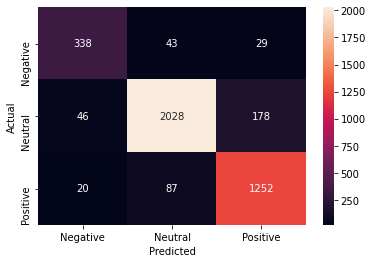

In [67]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, predicted, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='.0f')
plt.show()

In [68]:
#@title Make a predication:
sent = 'messi best player' #@param {type:"string"}
sent = union.transform([sent])
print(model.predict(sent)[0])

Positive


In [69]:
y_test = np.array(y_test)
predicted = np.array(predicted)
data_test = np.array(data_test)
print()

In [70]:
#what did the model misclassifiy
predictedprob = model.predict_proba(X_test) 
for i in range(len(predictedprob)):
    for j in range(len(predictedprob[i])):
        predictedprob[i][j] = '{0:.2f}'.format(predictedprob[i][j])
missclassified=[]
true=[]
prd=[]
prdprob=[]
other_prdprob=[]
for i in range(len(y_test)):
    if y_test[i] != predicted[i]:
        missclassified.append(data_test[i])
        true.append(str(y_test[i]))
        prd.append(str(predicted[i]))
        indx=np.argmax(predictedprob[i])
        prdprob.append(str(predictedprob[i][indx]))
        other_prdprob.append(str(predictedprob[i]))
miss = pd.DataFrame(missclassified,columns=["sentence"])
miss["True"] = true
miss["Predicated"] = prd
miss["Confidance"] = prdprob
miss["All_prob"] = other_prdprob

In [71]:
pd.set_option('display.max_colwidth', -1)
miss.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,sentence,True,Predicated,Confidance,All_prob
0,gentleman ill ask bi ronaldo champion place ajax bey took thesis went juve watched juveajax ucl keep going king leomessi,Negative,Neutral,1.0,[0. 1. 0.]
1,let move second topic today please dont welcomed mahdi messi may messiah mehdi alikocyaln z,Neutral,Positive,0.93,[0.07 0. 0.93]
2,sharing messi ronaldos son ronaldofootballplayer lionelmessifootballplayer footballi,Neutral,Positive,0.96,[0. 0.04 0.96]
3,the idiot bar a management dropped team despite leo messi gave million euro real griezman dembele coutinho able play leo messi barca management destroyed,Negative,Positive,1.0,[0. 0. 1.]
4,messi hahahahahaha,Neutral,Positive,0.98,[0.01 0.02 0.98]
...,...,...,...,...,...
95,uclde good scorer name cristianoronaldo goal lionelmessi goal ra l goal robertlewandowski goal karimbenzema goalsuefa championsleague cr ronaldo messi messi,Positive,Neutral,1.0,[0. 1. 0.]
96,since lionelmessi sentenced month jail tax fraud messi ay hebs,Negative,Neutral,1.0,[0. 1. 0.]
97,an era let admit messi,Neutral,Positive,1.0,[0. 0. 1.]
98,favorite fitbolcubatigol rivaldoleo messi man nesironaldinho,Positive,Neutral,0.87,[0. 0.87 0.13]


In [72]:
#BERT
data_train, data_test, y_train, y_test = train_test_split(data.normalized_tweet, targets, test_size=0.2, random_state=1)
traindf = pd.DataFrame(np.array(data_train), columns=["tweet"])
traindf["label"] = np.array(y_train)
devdf = pd.DataFrame(np.array(data_test), columns=["tweet"])
devdf["label"] = np.array(y_test)

In [73]:
import pandas as pd
import sklearn
import logging

In [74]:
from simpletransformers.classification import ClassificationModel

In [90]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Create a ClassificationModel
bertmodel = ClassificationModel('bert', 'bert-base-cased', num_labels=3, use_cuda=True, cuda_device=0,
                            args={
    'reprocess_input_data': True,
    "learning_rate": 4e-5,
    'overwrite_output_dir': True,
    'num_train_epochs': 3,    "save_eval_checkpoints": False,
    "save_steps": -1,}
    )
print(traindf.head())

# Train the bertmodel
bertmodel.train_model(traindf, eval_df=devdf)

INFO:filelock:Lock 139845630037520 acquired on /root/.cache/huggingface/transformers/092cc582560fc3833e556b3f833695c26343cb54b7e88cd02d40821462a74999.1f48cab6c959fc6c360d22bea39d06959e90f5b002e77e836d2da45464875cda.lock


Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

INFO:filelock:Lock 139845630037520 released on /root/.cache/huggingface/transformers/092cc582560fc3833e556b3f833695c26343cb54b7e88cd02d40821462a74999.1f48cab6c959fc6c360d22bea39d06959e90f5b002e77e836d2da45464875cda.lock


TqdmDeprecationWarning: ignored

In [91]:
predictions, raw_outputs = bertmodel.predict(np.array(data_test))

NameError: ignored

In [ ]:
from sklearn.metrics import f1_score,classification_report
f1_score(y_true=np.array(y_test), y_pred=predictions, average='micro')
F1.append(f1)

In [ ]:
score = metrics.accuracy_score(np.array(y_test), predictions)*100
Accuracy.append(score)

In [92]:
predictions_train, raw_outputs_train = bertmodel.predict(np.array(data_train))

NameError: ignored